# kaggle - Backpack Prediction Challenge

# Pre-Reqs:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
#Train Dataset
TrainDataset = pd.read_csv('/content/train.csv')
TrainDataset.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [ ]:
TrainDataset.shape

(300000, 11)

In [ ]:
#Test Dataset
TestDataset = pd.read_csv('/content/test.csv')
TestDataset.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [ ]:
TestDataset.shape

(200000, 10)

In [ ]:
#Training Dataset Extra
TrainDatasetExt = pd.read_csv('/content/training_extra.csv')
TrainDatasetExt.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461


In [ ]:
TrainDatasetExt.shape

(3694318, 11)

# Data-Cleanup:

In [ ]:
#Check for empty columns in datasets
print("Train Dataset:\n",TrainDataset.isnull().sum())
print(" ")
print("Test Dataset:\n",TestDataset.isnull().sum())
print(" ")
print("Train Extra Dataset:\n",TrainDatasetExt.isnull().sum())

Train Dataset:
 id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64
 
Test Dataset:
 id                         0
Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)      77
dtype: int64
 
Train Extra Dataset:
 id                           0
Brand                   117053
Material                102615
Size                     81190
Compartments                 0
Laptop Compartment       91089
Waterproof               87274
Style                    96210
Color                   123667
Weight Capacity (kg)      167

In [ ]:
####################################Missing Values Clean####################################

######################################Encoding####################################

######################################TrainDataset Missing Values ####################################

############################Brand - Encoding

BrandTDEnc = {
    'Jansport': 1,
    'Under Armour': 2,
    'Nike': 3,
    'Adidas':4,
    'Puma':5,
    ' ' :10
}

Null = 11

TrainDataset['Brand'] = TrainDataset['Brand'].map(BrandTDEnc)
TrainDataset['Brand'] = TrainDataset['Brand'].fillna(Null)

############################Material - Encoding

MaterialTDEnc = {
    'Leather': 1,
    'Canvas': 2,
    'Nylon': 3,
    'Polyester':4,
    ' ':10

}

Null = 11

TrainDataset['Material'] = TrainDataset['Material'].map(MaterialTDEnc)
TrainDataset['Material'] = TrainDataset['Material'].fillna(Null)

############################Size - Encoding

SizeTDEnc = {
    'Small': 1,
    'Medium': 2,
    'Large': 3,
    ' ':10

}

Null = 11

TrainDataset['Size'] = TrainDataset['Size'].map(SizeTDEnc)
TrainDataset['Size'] = TrainDataset['Size'].fillna(Null)

############################Laptop Compartment - Encoding

LaptopCompartmentTDEnc = {
    'Yes': 1,
    'No': 2,
    ' ': 10

}

Null = 11

TrainDataset['Laptop Compartment'] = TrainDataset['Laptop Compartment'].map(LaptopCompartmentTDEnc)
TrainDataset['Laptop Compartment'] = TrainDataset['Laptop Compartment'].fillna(Null)

############################Waterproof - Encoding

WaterproofTDEnc = {
    'Yes': 1,
    'No': 2,
    ' ': 10

}

Null = 11

TrainDataset['Waterproof'] = TrainDataset['Waterproof'].map(WaterproofTDEnc)
TrainDataset['Waterproof'] = TrainDataset['Waterproof'].fillna(Null)

############################Style - Encoding

StyleTDEnc = {
    'Tote': 1,
    'Messenger': 2,
    'Backpack': 3,
    ' ': 10

}

Null = 11

TrainDataset['Style'] = TrainDataset['Style'].map(StyleTDEnc)
TrainDataset['Style'] = TrainDataset['Style'].fillna(Null)

############################Color - Encoding

ColorTDEnc = {
    'Black': 1,
    'Green': 2,
    'Red': 3,
    'Blue': 4,
    'Gray':5,
    'Pink':6,
    ' ':10
}

Null = 11

TrainDataset['Color'] = TrainDataset['Color'].map(ColorTDEnc)
TrainDataset['Color'] = TrainDataset['Color'].fillna(Null)

######################################TestDataset Missing Values ####################################

############################Brand - Encoding

BrandTesDEnc = {
    'Jansport': 1,
    'Under Armour': 2,
    'Nike': 3,
    'Adidas':4,
    'Puma':5,
    ' ' :10
}

Null = 11

TestDataset['Brand'] = TestDataset['Brand'].map(BrandTesDEnc)
TestDataset['Brand'] = TestDataset['Brand'].fillna(Null)

############################Material - Encoding

MaterialTesDEnc = {
    'Leather': 1,
    'Canvas': 2,
    'Nylon': 3,
    'Polyester':4,
    ' ':10

}

Null = 11

TestDataset['Material'] = TestDataset['Material'].map(MaterialTesDEnc)
TestDataset['Material'] = TestDataset['Material'].fillna(Null)

############################Size - Encoding

SizeTesDEnc = {
    'Small': 1,
    'Medium': 2,
    'Large': 3,
    ' ':10

}

Null = 11

TestDataset['Size'] = TestDataset['Size'].map(SizeTesDEnc)
TestDataset['Size'] = TestDataset['Size'].fillna(Null)

############################Laptop Compartment - Encoding

LaptopCompartmentTesDEnc = {
    'Yes': 1,
    'No': 2,
    ' ': 10

}

Null = 11

TestDataset['Laptop Compartment'] = TestDataset['Laptop Compartment'].map(LaptopCompartmentTesDEnc)
TestDataset['Laptop Compartment'] = TestDataset['Laptop Compartment'].fillna(Null)

############################Waterproof - Encoding

WaterproofTesDEnc = {
    'Yes': 1,
    'No': 2,
    ' ': 10

}

Null = 11

TestDataset['Waterproof'] = TestDataset['Waterproof'].map(WaterproofTesDEnc)
TestDataset['Waterproof'] = TestDataset['Waterproof'].fillna(Null)

############################Style - Encoding

StyleTesDEnc = {
    'Tote': 1,
    'Messenger': 2,
    'Backpack': 3,
    ' ': 10

}

Null = 11

TestDataset['Style'] = TestDataset['Style'].map(StyleTesDEnc)
TestDataset['Style'] = TestDataset['Style'].fillna(Null)

############################Color - Encoding

ColorTesDEnc = {
    'Black': 1,
    'Green': 2,
    'Red': 3,
    'Blue': 4,
    'Gray':5,
    'Pink':6,
    ' ':10
}

Null = 11

TestDataset['Color'] = TestDataset['Color'].map(ColorTesDEnc)
TestDataset['Color'] = TestDataset['Color'].fillna(Null)

######################################TrainDatasetExt Missing Values ####################################

############################Brand - Encoding

BrandTDExEnc = {
    'Jansport': 1,
    'Under Armour': 2,
    'Nike': 3,
    'Adidas':4,
    'Puma':5,
    ' ' :10
}

Null = 11

TrainDatasetExt['Brand'] = TrainDatasetExt['Brand'].map(BrandTDExEnc)
TrainDatasetExt['Brand'] = TrainDatasetExt['Brand'].fillna(Null)

############################Material - Encoding

MaterialTDExEnc = {
    'Leather': 1,
    'Canvas': 2,
    'Nylon': 3,
    'Polyester':4,
    ' ':10

}

Null = 11

TrainDatasetExt['Material'] = TrainDatasetExt['Material'].map(MaterialTDExEnc)
TrainDatasetExt['Material'] = TrainDatasetExt['Material'].fillna(Null)

############################Size - Encoding

SizeTesDExEnc = {
    'Small': 1,
    'Medium': 2,
    'Large': 3,
    ' ':10

}

Null = 11

TrainDatasetExt['Size'] = TrainDatasetExt['Size'].map(SizeTesDExEnc)
TrainDatasetExt['Size'] = TrainDatasetExt['Size'].fillna(Null)

############################Laptop Compartment - Encoding

LaptopCompartmentTesDExEnc = {
    'Yes': 1,
    'No': 2,
    ' ': 10

}

Null = 11

TrainDatasetExt['Laptop Compartment'] = TrainDatasetExt['Laptop Compartment'].map(LaptopCompartmentTesDExEnc)
TrainDatasetExt['Laptop Compartment'] = TrainDatasetExt['Laptop Compartment'].fillna(Null)

############################Waterproof - Encoding

WaterproofTesDExEnc = {
    'Yes': 1,
    'No': 2,
    ' ': 10

}

Null = 11

TrainDatasetExt['Waterproof'] = TrainDatasetExt['Waterproof'].map(WaterproofTesDExEnc)
TrainDatasetExt['Waterproof'] = TrainDatasetExt['Waterproof'].fillna(Null)

############################Style - Encoding

StyleTesDExEnc = {
    'Tote': 1,
    'Messenger': 2,
    'Backpack': 3,
    ' ': 10

}

Null = 11

TrainDatasetExt['Style'] = TrainDatasetExt['Style'].map(StyleTesDExEnc)
TrainDatasetExt['Style'] = TrainDatasetExt['Style'].fillna(Null)

############################Color - Encoding

ColorTesDExEnc = {
    'Black': 1,
    'Green': 2,
    'Red': 3,
    'Blue': 4,
    'Gray':5,
    'Pink':6,
    ' ':10
}

Null = 11

TrainDatasetExt['Color'] = TrainDatasetExt['Color'].map(ColorTesDExEnc)
TrainDatasetExt['Color'] = TrainDatasetExt['Color'].fillna(Null)


In [ ]:
print(TrainDatasetExt['Brand'].unique())

[ 2.  5.  1.  3.  4. 11.]


In [ ]:
############################Weight Capacity KG - Missing value fill - TestDataset

TestDataset['Weight Capacity (kg)'].fillna(TestDataset['Weight Capacity (kg)'].mean(), inplace=True)  # Mean

############################Weight Capacity KG - Missing value fill - TrainDataset

TrainDataset['Weight Capacity (kg)'].fillna(TrainDataset['Weight Capacity (kg)'].mean(), inplace=True)  # Mean

############################Weight Capacity KG - Missing value fill  -TrainDatasetExt

TrainDatasetExt['Weight Capacity (kg)'].fillna(TrainDatasetExt['Weight Capacity (kg)'].mean(), inplace=True)  # Mean

############################Price - Missing value fill  -TrainDatasetExt

TrainDatasetExt['Price'].fillna(TrainDatasetExt['Price'].mean(), inplace=True)  # Mean

<ipython-input-10-8644b4cc896d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  TestDataset['Weight Capacity (kg)'].fillna(TestDataset['Weight Capacity (kg)'].mean(), inplace=True)  # Mean
<ipython-input-10-8644b4cc896d>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [ ]:
print("Test Dataset:\n",TrainDatasetExt.isnull().sum())

Test Dataset:
 id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64


In [ ]:
#Check Traindataset is completley numeric

all_numeric = TrainDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()

print(f"Are all values numeric? {all_numeric}")

print("\n")


#Check TestDataset is completley numeric

all_numeric = TestDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()

print(f"Are all values numeric? {all_numeric}")

print("\n")

#Check TrainDatasetExt is completley numeric

all_numeric = TrainDatasetExt.applymap(lambda x: isinstance(x, (int, float))).all().all()

print(f"Are all values numeric? {all_numeric}")



<ipython-input-12-aecd5be0e884>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_numeric = TrainDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()


Are all values numeric? True




<ipython-input-12-aecd5be0e884>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_numeric = TestDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()


Are all values numeric? True




<ipython-input-12-aecd5be0e884>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  all_numeric = TrainDatasetExt.applymap(lambda x: isinstance(x, (int, float))).all().all()


Are all values numeric? True


In [ ]:
#After encoding - predicting missing values
#Values that = ' ' or Null have been encoded as numbers 10 OR 11
#Machine learning to predict these values more accuratley for further classification of price


# Function to predict missing values (10, 11)
def predict_missing_values(dataset):
    feature_cols = [col for col in dataset.columns if col != 'id']

    for col in feature_cols:
        missing_rows = dataset[dataset[col].isin([10, 11])]
        known_rows = dataset[~dataset[col].isin([10, 11])]

        if not missing_rows.empty and not known_rows.empty:
            X = known_rows.drop(columns=[col])
            y = known_rows[col]

            # Ensure y has valid values (avoid NaNs)
            if y.isna().sum() > 0:
                y = y.fillna(y.mode()[0])  # Fill NaNs with mode

            X_missing = missing_rows.drop(columns=[col])

            if not X_missing.empty:
                # Check if the column is numeric or categorical
                if y.dtypes == 'object' or len(y.unique()) < 20:  # Assume categorical if few unique values
                    model = DecisionTreeClassifier()  # Use classification for categorical values
                else:
                    model = DecisionTreeRegressor()  # Use regression for numeric values

                model.fit(X, y)
                predictions = model.predict(X_missing)
                dataset.loc[dataset[col].isin([10, 11]), col] = predictions

    return dataset

# Apply the function to all datasets
TrainDataset = predict_missing_values(TrainDataset)
TestDataset = predict_missing_values(TestDataset)
TrainDatasetExt = predict_missing_values(TrainDatasetExt)

# Verify if missing values are filled
print(TrainDataset[TrainDataset.isin([10, 11])])
print(TestDataset[TestDataset.isin([10, 11])])
print(TrainDatasetExt[TrainDatasetExt.isin([10, 11])])


        id  Brand  Material  Size  Compartments  Laptop Compartment  \
0      NaN    NaN       NaN   NaN           NaN                 NaN   
1      NaN    NaN       NaN   NaN           NaN                 NaN   
2      NaN    NaN       NaN   NaN           NaN                 NaN   
3      NaN    NaN       NaN   NaN           NaN                 NaN   
4      NaN    NaN       NaN   NaN           NaN                 NaN   
...     ..    ...       ...   ...           ...                 ...   
299995 NaN    NaN       NaN   NaN           NaN                 NaN   
299996 NaN    NaN       NaN   NaN           NaN                 NaN   
299997 NaN    NaN       NaN   NaN           NaN                 NaN   
299998 NaN    NaN       NaN   NaN           NaN                 NaN   
299999 NaN    NaN       NaN   NaN           NaN                 NaN   

        Waterproof  Style  Color  Weight Capacity (kg)  Price  
0              NaN    NaN    NaN                   NaN    NaN  
1              NaN 

# Data Analysis:

In [ ]:
print(TrainDataset.shape)  # Check number of columns
print(TrainDatasetExt.shape)
print(TestDataset.shape)

(300000, 11)
(3694318, 11)
(200000, 10)


In [ ]:
TrainDataset.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,1.0,1.0,2.0,7.0,1.0,2.0,1.0,1.0,11.611723,112.15875
1,1,1.0,2.0,1.0,9.0,1.0,1.0,2.0,2.0,27.078537,68.88056
2,2,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,16.643760,39.17320
3,3,3.0,3.0,1.0,8.0,1.0,2.0,2.0,2.0,12.937220,80.60793
4,4,4.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,17.749338,86.02312


<ipython-input-17-3d3d76ac39aa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")


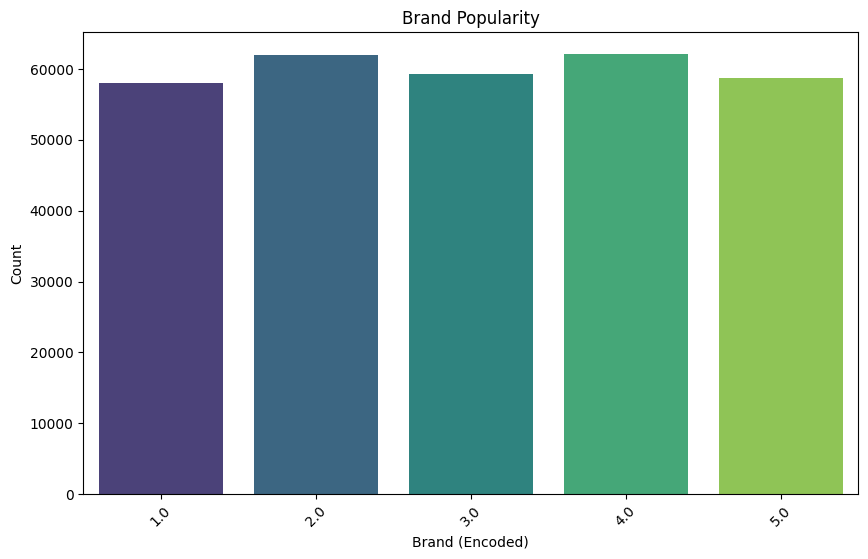

In [ ]:
# Count brand occurrences
brand_counts = TrainDataset["Brand"].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")

# Customize plot
plt.xlabel("Brand (Encoded)")
plt.ylabel("Count")
plt.title("Brand Popularity")
plt.xticks(rotation=45)
plt.show()

# Machine Learning Method 1:


In [ ]:
print("TrainDataset Columns:", TrainDataset.columns.tolist())
print("TrainDatasetExt Columns:", TrainDatasetExt.columns.tolist())

# Check for extra/missing columns
missing_cols = set(TrainDataset.columns) - set(TrainDatasetExt.columns)
extra_cols = set(TrainDatasetExt.columns) - set(TrainDataset.columns)

print("Columns in TrainDataset but not in TrainDatasetExt:", missing_cols)
print("Columns in TrainDatasetExt but not in TrainDataset:", extra_cols)


TrainDataset Columns: ['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price']
TrainDatasetExt Columns: ['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price']
Columns in TrainDataset but not in TrainDatasetExt: set()
Columns in TrainDatasetExt but not in TrainDataset: set()


In [ ]:
# Step 1: Clean column names efficiently
def clean_columns(df):
    df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace(r"[^\w]", "", regex=True)
    return df

TrainDataset = clean_columns(TrainDataset)
TrainDatasetExt = clean_columns(TrainDatasetExt)

# Step 2: Downcast numeric columns to save memory
def optimize_dataframe(df):
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    for col in df.select_dtypes(include=['int64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='integer')
    return df

TrainDataset = optimize_dataframe(TrainDataset)
TrainDatasetExt = optimize_dataframe(TrainDatasetExt)

# Step 3: Ensure consistent structure before merging
if 'predicted_price' in TrainDataset.columns:
    TrainDataset = TrainDataset.drop(columns=['predicted_price'])

common_columns = list(set(TrainDataset.columns) & set(TrainDatasetExt.columns))
TrainDataset = TrainDataset[common_columns]
TrainDatasetExt = TrainDatasetExt[common_columns]

# Step 4: Concatenate and avoid duplications
TrainDataset = pd.concat([TrainDataset, TrainDatasetExt], ignore_index=True).drop_duplicates().reset_index(drop=True)

# Step 5: Drop rows with missing target ('price')
TrainDataset.dropna(subset=['price'], inplace=True)

# Step 6: Define features and target
X = TrainDataset.drop(columns=['id', 'price'])
y = pd.to_numeric(TrainDataset['price'], errors='coerce')

# Step 7: Train/test split with lower memory usage
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=58)

# Step 8: Train model with optimized parameters
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=58)  # Limit depth to save memory
model.fit(X_train, y_train)

# Step 9: Validate model performance
y_pred_valid = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
print(f"Validation RMSE: {rmse}")

# Step 10: Predict prices for the entire dataset
TrainDataset['predicted_price'] = model.predict(X)

# Step 11: Save predictions efficiently
TrainDataset[['id', 'predicted_price']].to_csv('submissionKaggle.csv', index=False, header=['id', 'Price'])

print("Predictions saved to submission.csv")

Validation RMSE: 38.8974138084068
Predictions saved to submission.csv


In [ ]:
#Trim csv
# Load the CSV
TrimDf = pd.read_csv('submissionKaggle.csv')

# Keep only the first 200,000 rows and save to a new file
TrimDf.iloc[:200000].to_csv('submissionKaggle_trimmed.csv', index=False)

print("File saved as TrainDataset_trimmed.csv")

File saved as TrainDataset_trimmed.csv


In [ ]:
def clean_columns(df):
    df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace(r"[^\w]", "", regex=True)
    return df

TrainDataset = clean_columns(TrainDataset)
TrainDatasetExt = clean_columns(TrainDatasetExt)

# Step 2: Ensure both datasets have the same structure before concatenation
if 'predicted_price' in TrainDataset.columns:
    TrainDataset = TrainDataset.drop(columns=['predicted_price'])  # Remove extra column

common_columns = list(set(TrainDataset.columns) & set(TrainDatasetExt.columns))  # Get matching columns
TrainDataset = TrainDataset[common_columns]
TrainDatasetExt = TrainDatasetExt[common_columns]

# Step 3: Concatenate TrainDatasetExt into TrainDataset (row-wise)
TrainDataset = pd.concat([TrainDataset, TrainDatasetExt], axis=0, ignore_index=True).drop_duplicates().reset_index(drop=True)

# Step 4: Drop rows with missing price values
TrainDataset = TrainDataset.dropna(subset=['price'])

# Step 5: Define features and target
X = TrainDataset.drop(columns=['id', 'price'])  # Features
y = TrainDataset['price']  # Target variable

# Step 6: Ensure y is numeric
y = pd.to_numeric(y, errors='coerce')

# Step 7: Train/test split for model validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=58)

# Step 8: Train the model (RandomForestRegressor)
model = RandomForestRegressor(n_estimators=400, random_state=58)
model.fit(X_train, y_train)

# Step 9: Validate model performance
y_pred_valid = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
print(f"Validation RMSE: {rmse}")

# Step 10: Predict prices for the entire dataset
TrainDataset['predicted_price'] = model.predict(X)

# Step 11: Save predictions to submission.csv
TrainDataset[['id', 'predicted_price']].to_csv('submissionKaggleNewTry.csv', index=False, header=['id', 'Price'])

print("Predictions saved to submissionKaggleNewTry.csv")

In [ ]:

# Ensure TrainDatasetExt has the same column structure as TrainDataset
TrainDatasetExt.columns = TrainDataset.columns  # Force same column order

# Concatenate TrainDatasetExt to TrainDataset (row-wise, remove duplicate headers)
TrainDataset = pd.concat([TrainDataset, TrainDatasetExt], axis=0, ignore_index=True).drop_duplicates().reset_index(drop=True)

# Standardize column names (lowercase, remove spaces, replace special characters)
TrainDataset.columns = TrainDataset.columns.str.lower().str.replace(" ", "_").str.replace(r"[^\w]", "", regex=True)

# Drop rows with missing price values
TrainDataset = TrainDataset.dropna(subset=['price'])

# Define features and target
X = TrainDataset.drop(columns=['id', 'price'])  # Features
y = TrainDataset['price']  # Target variable

# Ensure y is numeric
y = pd.to_numeric(y, errors='coerce')

# Train/test split for evaluation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (RandomForestRegressor)
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Validate model performance
y_pred_valid = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred_valid))
print(f"Validation RMSE: {rmse}")

# Predict prices for the entire training dataset
TrainDataset['predicted_price'] = model.predict(X)

# Save predictions to submission.csv
TrainDataset[['id', 'predicted_price']].to_csv('submission.csv', index=False, header=['id', 'Price'])

print("Predictions saved to submission NEW.csv")